# Pytorch Computer Vision 

* See reference notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb
* See reference online book - https://www.learnpytorch.io/03_pytorch_computer_vision/

## 0. Computer vision libraries in PyTorch

* 'Torchvision' - base domain library for PyTorch for computer vision 
* 'Torchvision.datasets' - get datasets and data loading functions for computer vision here
* 'Torchvision.models' - get pretrained computer vision models that you can leverage for your own problems
* 'Torchvision.transforms' - functions for manipulating your vision data (images) to be suitable for use with an ML model
* 'torch.uitils.data.Dataset' - Base dataset class for PyTorch
* 'torch.utils.data.DataLoader' - Creates a python iterable over a dataset

In [1]:
# import PyTorch
import torch
from torch import nn

# Import torch vision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visulization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.0.1+cpu
0.15.2+cpu


## 1. Getting a dataset

The data we will be using is FashionMNIST from torchvision.datasets

https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root= "data", # Where to download the data
    train=True, # Do we want the training or testing dataset
    download = True, # Do we want to download the dataset
    transform=ToTensor(), # How do we want to transform the data
    target_transform=None # How do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root= "data", # Where to download the data
    train=False, # Do we want the training or testing dataset
    download = True, # Do we want to download the dataset
    transform=ToTensor(), # How do we want to transform the data
    target_transform=None # How do we want to transform the labels/targets?
)

In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
# Check the shape of our image
print(f"Image Shape: {image.shape} -> [colour_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image Shape: torch.Size([1, 28, 28]) -> [colour_channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data 

Image Shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

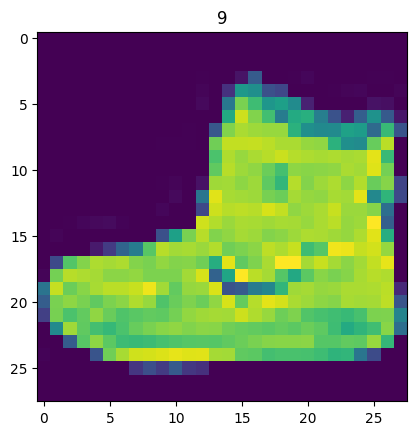

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image Shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

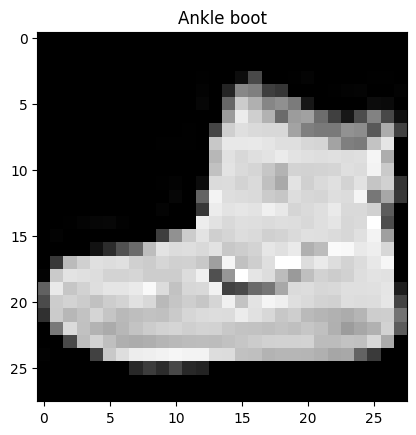

In [10]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.show()

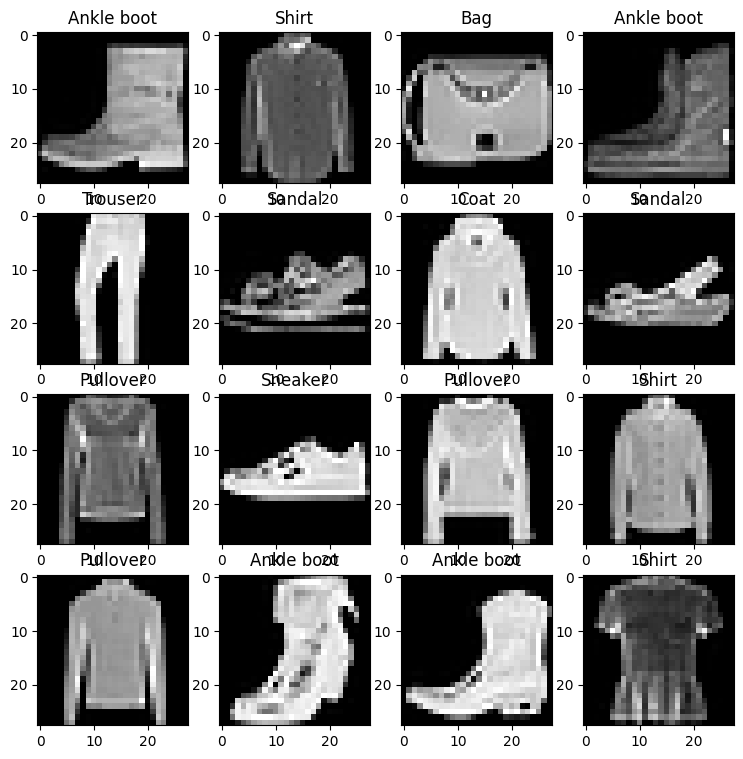

In [11]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label =train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_names[label])    

Do you think these items of clothing (images) could be modelled with pure linear lines? Or do u think we will need non-linearities? 


In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare data loader

Right now our data is in the form of PyTorch datasets.

DataLoader turns our dataset into a Python iterable.

More specifically we want to turn our data into batches (or mini-batches).

Why would we do this? 

1. Its more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradient per epoch.

For more on mini-batches, see here: https://www.youtube.com/watch?v=4qJaSmvhxi8

In [13]:
from torch.utils.data import DataLoader

# Setup batchsize hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2482e700820>,
 <torch.utils.data.dataloader.DataLoader at 0x2483fabfb20>)

In [14]:
# Lets check out what we've created 
print(f"DataLoaders: {train_dataloader,test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...") 

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x000002482E700820>, <torch.utils.data.dataloader.DataLoader object at 0x000002483FABFB20>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [15]:
#Check out whats inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


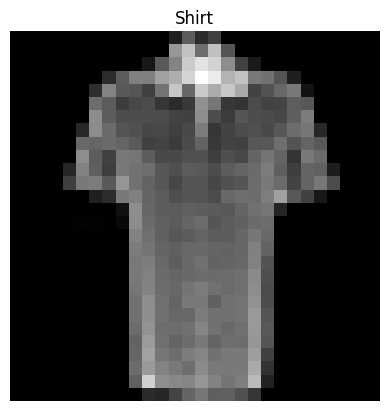

In [16]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, its best practice to start with a baseline model.

A baseline model is a simple model you wil try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary

In [17]:
# Creating a flattten latyer
flatten_model = nn.Flatten()

#Get a sincgle sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happned
print(f"Shape before flatenning: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flatenning: {output.shape} -> color_channels, height*width")

Shape before flatenning: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flatenning: torch.Size([1, 784]) -> color_channels, height*width


In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential( 
                                         nn.Flatten(),
                                         nn.Linear(in_features=input_shape, out_features=hidden_units),
                                         nn.Linear(in_features= hidden_units, out_features= output_shape)
                                                                                  )
    def forward(self, x):
        return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

#Setup model with input parameters 
model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units = 10,
    output_shape = len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be nn.CrossEntropyLoss()
* Optmizer - our optimizer 'torch.optim.SGD()' 
* Evaluation metric - since we're working on a classification problem, lets use accuracy as our evaluation metric

In [22]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
    print("helper_function.py already exists, skipping download..")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.wite(request.content)

helper_function.py already exists, skipping download..


In [23]:
# Import accuracy metric 
from helper_functions import accuracy_fn

#setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.1)

### 3.2 Creating a Function to time our experiments

Machine learning is very experimental 

Two of the main things you'll often want to track are:
1. Model's Performance (loss and accuracy values etc)
2. How fast it runs


In [24]:
from timeit import default_timer as timer 

def print_train_time(start: float, end: float, device : torch.device = None ):
    """ Prints the difference between start and end time"""
    total_time = end - start 
    print(f"Train time on {device}: {total_time: .3f} seconds")
    return total_time

In [25]:
start_time = timer()
#some code
end_time = timer()
print_train_time(start_time,end=end_time,device="cpu")

Train time on cpu:  0.000 seconds


6.610003765672445e-05

### 3.4 Create a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out whats happening.
5. Time it all 

In [26]:
# Import tqdm for progress bar
from tqdm.auto import  tqdm

#set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs(we'll keep this small for faster training time)
epochs = 3

# Create training and test loop 
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n -------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()
        #1. Forward pass
        y_pred = model_0(X)
        
        #2. Calculate loss (per batch)
        loss = loss_fn(y_pred,y)
        train_loss += loss # accumulate train_loss

        #3. optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        #5. Optimizer step
        optimizer.step()

        # Print out whats happening
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    # Divide total train loss by the length of train_dataloader
    train_loss /= len(train_dataloader)

    ## Testing 
    test_loss, test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            # Forward pass
            test_pred = model_0(X_test)

            # Calculate the loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)

            # Caclulate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred= test_pred.argmax(dim=1))
        
        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calcualte the test acc average per batch
        test_acc /= len(test_dataloader)

    # Print out whats happening
    print(f"\n Trainloss: train loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))

C:\Users\Gaurav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
 -------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 33%|███▎      | 1/3 [00:19<00:38, 19.08s/it]


 Trainloss: train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
 -------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 67%|██████▋   | 2/3 [00:37<00:18, 18.47s/it]


 Trainloss: train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
 -------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


100%|██████████| 3/3 [00:54<00:00, 18.29s/it]


 Trainloss: train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu:  54.871 seconds


## 4. Make predictions and get Model 0 results

In [27]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """
    Returns a dictionary containing the results of model predicting on data_loader.
    """
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred,y)
            acc+= accuracy_fn(y_true = y,
                              y_pred = y_pred.argmax(dim = 1))
            
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return{"model_name": model.__class__.__name__, # only works when model was created with a class
           "model_loss": loss.item(),
           "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn= accuracy_fn)
model_0_results

100%|██████████| 313/313 [00:02<00:00, 110.36it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766390025615692,
 'model_acc': 83.42651757188499}